In [391]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf

LECTURA DE DATOS

In [392]:
df_general = pd.read_csv('general_data.csv')

#tamaño de dataframe general
df_general.shape

(8820, 24)

In [393]:
df_encuesta = pd.read_csv('employee_survey_data.csv')

#tamaño de dataframe encuesta
df_encuesta.shape

(8820, 5)

In [394]:
df_manager = pd.read_csv('manager_survey.csv')

#tamaño de dataframe manager
df_manager.shape

(8820, 4)

In [395]:
df_retiro= pd.read_csv('retirement_info.csv')

#tamaño de dataframe retirement
df_retiro.shape

(711, 5)

Respecto a la base de datos general, se puede observar que al analizarla hay algunas columnas que son candidatas a ser eliminadas. Columnas como Over18, revisar StandardHours	para ver si hay datos diferentes a 8, standardhours hay que analizar si tiene valores diferentes a 8.

Tambien es importante destacar que hay columnas que posiblemente presenten una correlación fuerte con nuestra variable objetivo (retiros), como PercentSalaryHike, YearsAtCompany, YearsWithCurrManager

In [396]:
df_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      8820 non-null   int64  
 1   BusinessTravel           8820 non-null   object 
 2   Department               8820 non-null   object 
 3   DistanceFromHome         8820 non-null   int64  
 4   Education                8820 non-null   int64  
 5   EducationField           8820 non-null   object 
 6   EmployeeCount            8820 non-null   int64  
 7   EmployeeID               8820 non-null   int64  
 8   Gender                   8820 non-null   object 
 9   JobLevel                 8820 non-null   int64  
 10  JobRole                  8820 non-null   object 
 11  MaritalStatus            8820 non-null   object 
 12  MonthlyIncome            8820 non-null   int64  
 13  NumCompaniesWorked       8782 non-null   float64
 14  Over18                  

In [397]:
#Renombrar columnna de fecha que aparece como InfoDate a Year
df_general = df_general.rename(columns={'InfoDate': 'Year'})

In [398]:
#revision de columnas
df_general

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Year
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,2015-12-31
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,Y,23,8,1,6.0,3,5,1,4,2015-12-31
2,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,Y,15,8,3,5.0,2,5,0,3,2015-12-31
3,38,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,...,Y,11,8,3,13.0,5,8,7,5,2015-12-31
4,32,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,...,Y,12,8,2,9.0,2,6,0,4,2015-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,42,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,...,Y,17,8,1,10.0,5,3,0,2,2016-12-31
8816,29,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,...,Y,15,8,0,10.0,2,3,0,2,2016-12-31
8817,25,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,...,Y,20,8,0,5.0,4,4,1,2,2016-12-31
8818,42,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,...,Y,14,8,1,10.0,2,9,7,8,2016-12-31


In [399]:
#Renombrar columnna de fecha que aparece como DateSurvey a Year
df_encuesta = df_encuesta.rename(columns={'DateSurvey': 'Year'})

In [400]:
#Revision de columnas
df_encuesta

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Year
0,1,3.0,4.0,2.0,2015-12-31
1,2,3.0,2.0,4.0,2015-12-31
2,3,2.0,2.0,1.0,2015-12-31
3,4,4.0,4.0,3.0,2015-12-31
4,5,4.0,1.0,3.0,2015-12-31
...,...,...,...,...,...
8815,4406,4.0,1.0,3.0,2016-12-31
8816,4407,4.0,4.0,3.0,2016-12-31
8817,4408,1.0,3.0,3.0,2016-12-31
8818,4409,4.0,1.0,3.0,2016-12-31


In [401]:
#Renombrar columnna de fecha que aparece como SurveyDate a Year
df_manager = df_manager.rename(columns={'SurveyDate': 'Year'})

In [402]:
#Revision de columnas
df_manager

,EmployeeID,JobInvolvement,PerformanceRating,Year
0,1,3,3,2015-12-31
1,2,2,4,2015-12-31
2,3,3,3,2015-12-31
3,4,2,3,2015-12-31
4,5,3,3,2015-12-31
...,...,...,...,...
8815,4406,3,3,2016-12-31
8816,4407,2,3,2016-12-31
8817,4408,3,4,2016-12-31
8818,4409,2,3,2016-12-31


MERGED 1

En el primer merge de la base de datos se priorizó unir dos bases ( General y Encuesta) que tuvieran la misma cantidad de observaciones (8820) para tener claro que el dataframe resultante debía tener 8820 de igual manera, solamente aumentando la cantidad de columnas. La union se realizo con EmployeeID y con Year para garantizar que sean los empleados del mismo año en y el mismo ID

In [403]:
#Union de lo dataframes
df_merged1 = pd.merge(df_general, df_encuesta, on=['EmployeeID', 'Year'], how='outer')


In [404]:
#Revision de columnas
df_merged1

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Year,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,0,1.0,6,1,0,0,2015-12-31,3.0,4.0,2.0
1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,0,1.0,6,1,0,0,2016-12-31,3.0,4.0,2.0
2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,1,6.0,3,5,1,4,2015-12-31,3.0,2.0,4.0
3,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,3,5.0,2,5,0,3,2015-12-31,2.0,2.0,1.0
4,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,3,5.0,2,5,0,3,2016-12-31,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,33,Travel_Rarely,Sales,1,3,Life Sciences,1,8799,Male,2,...,0,13.0,2,9,1,7,2016-12-31,1.0,1.0,4.0
8816,32,Travel_Rarely,Sales,23,1,Life Sciences,1,8802,Male,3,...,0,4.0,2,3,1,2,2015-12-31,4.0,3.0,1.0
8817,32,Travel_Rarely,Sales,23,1,Life Sciences,1,8802,Male,3,...,0,4.0,2,3,1,2,2016-12-31,4.0,3.0,1.0
8818,37,Travel_Frequently,Sales,2,3,Marketing,1,8813,Male,1,...,1,17.0,2,1,0,0,2015-12-31,1.0,3.0,3.0


MERGED 2

En el segundo merged se decide unirlo con la base de datos de manager ya que tambien cuenta con 8820 observaciones y permite una revision facil para confirmar que no presente problemas. Además tambien se vuelven a unir según las columnas de EmployeeID y Year

In [405]:
#creacion del segundo merged donde ya se han consolidado 3 bases de datos 
df_merged2 = pd.merge(df_merged1,df_manager, on=['EmployeeID','Year'],how='outer')

In [406]:
#Revision del segundo merged
df_merged2

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Year,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,6,1,0,0,2015-12-31,3.0,4.0,2.0,3,3
1,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,6,1,0,0,2016-12-31,3.0,4.0,2.0,3,3
2,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,...,3,5,1,4,2015-12-31,3.0,2.0,4.0,2,4
3,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2,5,0,3,2015-12-31,2.0,2.0,1.0,3,3
4,32,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,...,2,5,0,3,2016-12-31,2.0,2.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,33,Travel_Rarely,Sales,1,3,Life Sciences,1,8799,Male,2,...,2,9,1,7,2016-12-31,1.0,1.0,4.0,3,3
8816,32,Travel_Rarely,Sales,23,1,Life Sciences,1,8802,Male,3,...,2,3,1,2,2015-12-31,4.0,3.0,1.0,3,3
8817,32,Travel_Rarely,Sales,23,1,Life Sciences,1,8802,Male,3,...,2,3,1,2,2016-12-31,4.0,3.0,1.0,3,3
8818,37,Travel_Frequently,Sales,2,3,Marketing,1,8813,Male,1,...,2,1,0,0,2015-12-31,1.0,3.0,3.0,3,3


In [407]:
#Se renombra la columna EmployeeID a Col_ID y se pone en la primera columna del dataframe para facilitar la revisión 

col_ID = df_merged2.pop('EmployeeID')

df_merged2.insert(0, 'EmployeeID', col_ID)

In [408]:
#Se renombra la columna Year a Col_Year y se pone en la segunda columna del dataframe para facilitar la revisión 

col_Year = df_merged2.pop('Year')

df_merged2.insert(1, 'Year', col_Year)

In [409]:
#Revision del segundo merged
df_merged2

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,2015-12-31,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,1,2016-12-31,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,2,2015-12-31,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,3,2015-12-31,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,3,2016-12-31,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,8799,2016-12-31,33,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,13.0,2,9,1,7,1.0,1.0,4.0,3,3
8816,8802,2015-12-31,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3
8817,8802,2016-12-31,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3
8818,8813,2015-12-31,37,Travel_Frequently,Sales,2,3,Marketing,1,Male,...,17.0,2,1,0,0,1.0,3.0,3.0,3,3


In [410]:
'''''
Se utiliza query para revisar los empleaados que se retiraron en el 2015 no deberían estar en 
la base de datos del 2016 porque ellos estarían en el 2014 (la cual no se tiene)
'''
df_merged2.query("EmployeeID == 3995")

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
7339,3995,2015-12-31,31,Travel_Rarely,Research & Development,2,3,Life Sciences,1,Male,...,2.0,2,1,0,0,4.0,1.0,3.0,3,3


In [411]:
#Cambiar la columna Year a tipo fecha (date time) y se reemplazan los valores de datetime en la columna Year otra vez pero con el nuevo formato
df_merged2['Year'] = pd.to_datetime(df_merged2['Year'])

In [412]:
#Del formato anterior extraemos solo el año ya que es la variable que nos importa
df_merged2['Year'] = df_merged2['Year'].dt.year

In [413]:
#Revision de los cambios efectuados
df_merged2

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,8799,2016,33,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,13.0,2,9,1,7,1.0,1.0,4.0,3,3
8816,8802,2015,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3
8817,8802,2016,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,2,3,1,2,4.0,3.0,1.0,3,3
8818,8813,2015,37,Travel_Frequently,Sales,2,3,Marketing,1,Male,...,17.0,2,1,0,0,1.0,3.0,3.0,3,3


MERGED 3

In [414]:
#Se renombra la columna retirementDate a RTYear
df_retiro = df_retiro.rename(columns={'retirementDate': 'RTYear'})

In [415]:
#Se convierte la columna RTYear a tipo fecha (date time)
df_retiro['RTYear'] = pd.to_datetime(df_retiro['RTYear'])

In [416]:
#Del formato date time extraemos solo el año y la metemos en la nueva columna llamada Year
df_retiro['Year'] = df_retiro['RTYear'].dt.year

In [417]:
#Del formato date time extraemos solo el año y la metemos en la nueva columna llamada RTYear
df_retiro['YearRT'] = df_retiro['RTYear'].dt.year

In [418]:
#Creacion de la nueva columna Month con los datos adquiridos de date time
df_retiro['Month'] = df_retiro['RTYear'].dt.month

In [419]:
#Revision de los cambios
df_retiro

,EmployeeID,Attrition,RTYear,retirementType,resignationReason,Year,YearRT,Month
0,2,Yes,2016-10-15,Resignation,Others,2016,2016,10
1,7,Yes,2016-07-20,Resignation,Stress,2016,2016,7
2,14,Yes,2016-11-08,Resignation,Others,2016,2016,11
3,29,Yes,2016-10-15,Resignation,Others,2016,2016,10
4,31,Yes,2016-02-08,Resignation,Salary,2016,2016,2
...,...,...,...,...,...,...,...,...
706,4382,Yes,2015-04-18,Resignation,Salary,2015,2015,4
707,4387,Yes,2015-09-16,Resignation,Others,2015,2015,9
708,4389,Yes,2015-05-24,Resignation,Others,2015,2015,5
709,4392,Yes,2015-02-26,Fired,NaN,2015,2015,2


In [420]:
#Filtramos solamente a un año ( el 2015 no nos interesa de momento) y posteriormente será eliminado 
df_ELIMINAR= df_retiro[df_retiro['Year'] == 2015]

In [421]:
#Se crea una copia del dataframe de retiro y a esta nueva copia se le eliminaron los datos del 2015
df_retiro2 = df_retiro.drop(df_ELIMINAR.index)

In [422]:
#Se elimina la columna RTYear
df_retiro2.drop('RTYear', axis=1, inplace=True)

In [423]:
#Revision de los cambios
df_retiro2

,EmployeeID,Attrition,retirementType,resignationReason,Year,YearRT,Month
0,2,Yes,Resignation,Others,2016,2016,10
1,7,Yes,Resignation,Stress,2016,2016,7
2,14,Yes,Resignation,Others,2016,2016,11
3,29,Yes,Resignation,Others,2016,2016,10
4,31,Yes,Resignation,Salary,2016,2016,2
...,...,...,...,...,...,...,...
645,3973,Yes,Resignation,Others,2016,2016,11
646,3974,Yes,Resignation,Others,2016,2016,4
647,3980,Yes,Resignation,Others,2016,2016,7
648,3981,Yes,Resignation,Others,2016,2016,2


In [424]:
#Se resta un año a la columna Year
df_retiro2['Year'] = df_retiro2['Year'] -1

In [425]:
df_retiro2

,EmployeeID,Attrition,retirementType,resignationReason,Year,YearRT,Month
0,2,Yes,Resignation,Others,2015,2016,10
1,7,Yes,Resignation,Stress,2015,2016,7
2,14,Yes,Resignation,Others,2015,2016,11
3,29,Yes,Resignation,Others,2015,2016,10
4,31,Yes,Resignation,Salary,2015,2016,2
...,...,...,...,...,...,...,...
645,3973,Yes,Resignation,Others,2015,2016,11
646,3974,Yes,Resignation,Others,2015,2016,4
647,3980,Yes,Resignation,Others,2015,2016,7
648,3981,Yes,Resignation,Others,2015,2016,2


In [426]:
#Creacion del tercer merged. en el cual ya se tienen los datos que nos interesa del dataframe retiro. Adiconmente se unen de acuerdo a EmployeeID y Year
df_merged3 = pd.merge(df_merged2,df_retiro2, on=['EmployeeID','Year'],how='outer')

In [427]:
#DATAFRAME FINAL
df_merged3

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementType,resignationReason,YearRT,Month
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3.0,2.0,4.0,2,4,Yes,Resignation,Others,2016.0,10.0
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,8799,2016,33,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,1.0,1.0,4.0,3,3,NaN,NaN,NaN,NaN,NaN
8816,8802,2015,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,3.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
8817,8802,2016,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,4.0,3.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
8818,8813,2015,37,Travel_Frequently,Sales,2,3,Marketing,1,Male,...,1.0,3.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN


IDENTIFICACIÓN E IMPUTACIÓN DE NULOS

In [428]:
df_merged3[df_merged3['Attrition']=='Yes']

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementType,resignationReason,YearRT,Month
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3.0,2.0,4.0,2,4,Yes,Resignation,Others,2016.0,10.0
11,7,2015,28,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,1.0,3.0,1.0,3,4,Yes,Resignation,Stress,2016.0,7.0
24,14,2015,47,Non-Travel,Research & Development,1,1,Medical,1,Male,...,1.0,2.0,2.0,2,3,Yes,Resignation,Others,2016.0,11.0
53,29,2015,44,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,4.0,3.0,1.0,2,3,Yes,Resignation,Others,2016.0,10.0
56,31,2015,26,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,1.0,2.0,3.0,2,3,Yes,Resignation,Salary,2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,3973,2015,34,Travel_Frequently,Research & Development,2,1,Life Sciences,1,Male,...,4.0,1.0,2.0,4,4,Yes,Resignation,Others,2016.0,11.0
7300,3974,2015,37,Travel_Rarely,Research & Development,24,3,Life Sciences,1,Male,...,4.0,1.0,1.0,3,3,Yes,Resignation,Others,2016.0,4.0
7311,3980,2015,26,Travel_Rarely,Human Resources,2,1,Technical Degree,1,Female,...,4.0,2.0,3.0,2,3,Yes,Resignation,Others,2016.0,7.0
7312,3981,2015,46,Travel_Rarely,Research & Development,10,3,Medical,1,Male,...,4.0,2.0,4.0,3,3,Yes,Resignation,Others,2016.0,2.0


In [429]:
# Columnas que contienen valores nulos
columns_with_nulls = df_merged3.columns[df_merged3.isnull().any()]
columns_with_nulls

Index(['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'Attrition', 'retirementType',
       'resignationReason', 'YearRT', 'Month'],
      dtype='object')

In [430]:
df_merged3['WorkLifeBalance'].value_counts()

WorkLifeBalance
3.0    5320
2.0    2038
4.0     908
1.0     478
Name: count, dtype: int64

Se identifica que los datos nulos de algunas variables pueden ser reemplazadas con la mediana: 'NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction' y 'WorkLifeBalance'.

In [431]:
# Imputación por la mediana
df_merged3["NumCompaniesWorked"]=df_merged3["NumCompaniesWorked"].apply(lambda x: x if not pd.isnull(x) else int(df_merged3["NumCompaniesWorked"].median()))
df_merged3["TotalWorkingYears"]=df_merged3["TotalWorkingYears"].apply(lambda x: x if not pd.isnull(x) else int(df_merged3["TotalWorkingYears"].median()))
df_merged3["EnvironmentSatisfaction"]=df_merged3["EnvironmentSatisfaction"].apply(lambda x: x if not pd.isnull(x) else int(df_merged3["EnvironmentSatisfaction"].median()))
df_merged3["JobSatisfaction"]=df_merged3["JobSatisfaction"].apply(lambda x: x if not pd.isnull(x) else int(df_merged3["JobSatisfaction"].median()))
df_merged3["WorkLifeBalance"]=df_merged3["WorkLifeBalance"].apply(lambda x: x if not pd.isnull(x) else int(df_merged3["WorkLifeBalance"].median()))

In [432]:
# Columnas que contienen valores nulos
columns_with_nulls = df_merged3.columns[df_merged3.isnull().any()]
columns_with_nulls

Index(['Attrition', 'retirementType', 'resignationReason', 'YearRT', 'Month'], dtype='object')

Y en el caso de las variables restantes (relacionadas con los datos de retiros) se entiende que las observaciones con datos nulos son los empleados que no se retiran. Por ende, la imputación de dichas datos debe ser por 'No aplica' o por valores de ese estilo.

In [433]:
# En el caso de 'Attrition' se reemplaza los nulos por 'No' dado que representa los empleados que no se retiran
df_merged3['Attrition'] = df_merged3['Attrition'].fillna('No')

In [434]:
# Además, con el objetivo de convertir la variable 'Attrition' en la variable objetivo más adelante, se reempaza 'Yes' por 1 y 'No' por 0 
df_merged3['Attrition'] = df_merged3['Attrition'].replace({'Yes': 1, 'No': 0})

C:\Users\Alanis Alvarez\AppData\Local\Temp\ipykernel_18456\2587486842.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged3['Attrition'] = df_merged3['Attrition'].replace({'Yes': 1, 'No': 0})


In [435]:
# En el caso de las variables restantes ('retirementType', 'resignationReason', 'YearRt' y 'Month') se reemplaza los nulos por 'Not Applicable'
df_merged3['retirementType'] = df_merged3['retirementType'].fillna('Not Applicable')
df_merged3['resignationReason'] = df_merged3['resignationReason'].fillna('Not Applicable')
df_merged3['YearRT'] = df_merged3['YearRT'].fillna('Not Applicable')
df_merged3['Month'] = df_merged3['Month'].fillna('Not Applicable')

In [436]:
df_merged3.columns

Index(['EmployeeID', 'Year', 'Age', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'retirementType',
       'resignationReason', 'YearRT', 'Month'],
      dtype='object')

In [437]:
# Se realiza el cambio de tipología de algunas variables
df_merged3['TotalWorkingYears'] = df_merged3['TotalWorkingYears'].astype(int)
df_merged3['EnvironmentSatisfaction'] = df_merged3['EnvironmentSatisfaction'].astype(int)
df_merged3['JobSatisfaction'] = df_merged3['JobSatisfaction'].astype(int)
df_merged3['WorkLifeBalance'] = df_merged3['WorkLifeBalance'].astype(int)
df_merged3['NumCompaniesWorked'] = df_merged3['NumCompaniesWorked'].astype(int)

In [438]:
df_merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8820 entries, 0 to 8819
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               8820 non-null   int64 
 1   Year                     8820 non-null   int32 
 2   Age                      8820 non-null   int64 
 3   BusinessTravel           8820 non-null   object
 4   Department               8820 non-null   object
 5   DistanceFromHome         8820 non-null   int64 
 6   Education                8820 non-null   int64 
 7   EducationField           8820 non-null   object
 8   EmployeeCount            8820 non-null   int64 
 9   Gender                   8820 non-null   object
 10  JobLevel                 8820 non-null   int64 
 11  JobRole                  8820 non-null   object
 12  MaritalStatus            8820 non-null   object
 13  MonthlyIncome            8820 non-null   int64 
 14  NumCompaniesWorked       8820 non-null  

In [439]:
df_merged3.head(8)

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementType,resignationReason,YearRT,Month
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3,4,2,3,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3,4,2,3,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3,2,4,2,4,1,Resignation,Others,2016.0,10.0
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2,2,1,3,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2,2,1,3,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
5,4,2015,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,4,4,3,2,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
6,4,2016,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,4,4,3,2,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable
7,5,2015,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,4,1,3,3,3,0,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [440]:
df_merged3['JobRole'].value_counts()

JobRole
Sales Executive              1956
Research Scientist           1752
Laboratory Technician        1554
Manufacturing Director        870
Healthcare Representative     786
Manager                       612
Sales Representative          498
Research Director             480
Human Resources               312
Name: count, dtype: int64

In [441]:
# Datos completos de solo los empleados que se retiran a usar en dashboard
df_only_retired = df_merged3[df_merged3['Attrition']==1]
df_only_retired

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,retirementType,resignationReason,YearRT,Month
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3,2,4,2,4,1,Resignation,Others,2016.0,10.0
11,7,2015,28,Travel_Rarely,Research & Development,11,2,Medical,1,Male,...,1,3,1,3,4,1,Resignation,Stress,2016.0,7.0
24,14,2015,47,Non-Travel,Research & Development,1,1,Medical,1,Male,...,1,2,2,2,3,1,Resignation,Others,2016.0,11.0
53,29,2015,44,Travel_Frequently,Research & Development,1,2,Medical,1,Male,...,4,3,1,2,3,1,Resignation,Others,2016.0,10.0
56,31,2015,26,Travel_Rarely,Research & Development,4,3,Medical,1,Male,...,1,2,3,2,3,1,Resignation,Salary,2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,3973,2015,34,Travel_Frequently,Research & Development,2,1,Life Sciences,1,Male,...,4,1,2,4,4,1,Resignation,Others,2016.0,11.0
7300,3974,2015,37,Travel_Rarely,Research & Development,24,3,Life Sciences,1,Male,...,4,1,1,3,3,1,Resignation,Others,2016.0,4.0
7311,3980,2015,26,Travel_Rarely,Human Resources,2,1,Technical Degree,1,Female,...,4,2,3,2,3,1,Resignation,Others,2016.0,7.0
7312,3981,2015,46,Travel_Rarely,Research & Development,10,3,Medical,1,Male,...,4,2,4,3,3,1,Resignation,Others,2016.0,2.0


In [442]:
# Exportación de los datos
df_only_retired.to_csv('only_retired.csv', index=False)

In [443]:
# Moviendo la columna 'Attrition' 2 posiciones a la derecha
cols = df_merged3.columns.tolist()
cols.insert(cols.index('Attrition')+2, cols.pop(cols.index('Attrition')))
df_merged3 = df_merged3[cols]

In [444]:
df_merged3.head(8)

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason,Attrition,YearRT,Month
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3,4,2,3,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,3,4,2,3,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,3,2,4,2,4,Resignation,Others,1,2016.0,10.0
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2,2,1,3,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,2,2,1,3,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
5,4,2015,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,4,4,3,2,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
6,4,2016,38,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,4,4,3,2,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable
7,5,2015,32,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,4,1,3,3,3,Not Applicable,Not Applicable,0,Not Applicable,Not Applicable


In [445]:
# Datos completos de todos los empleados solo hasta la variable 'Attrition', dejando por fuera el mes y el año del retiro

# Obtener las etiquetas de todas las columnas excepto las dos últimas
columnas_a_mantener = df_merged3.columns[:-2]

# Crear un nuevo DataFrame con las columnas seleccionadas
df_entire_data = df_merged3[columnas_a_mantener]
df_entire_data

,EmployeeID,Year,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType,resignationReason,Attrition
0,1,2015,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,0,0,3,4,2,3,3,Not Applicable,Not Applicable,0
1,1,2016,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,0,0,3,4,2,3,3,Not Applicable,Not Applicable,0
2,2,2015,31,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,1,4,3,2,4,2,4,Resignation,Others,1
3,3,2015,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,0,3,2,2,1,3,3,Not Applicable,Not Applicable,0
4,3,2016,32,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,0,3,2,2,1,3,3,Not Applicable,Not Applicable,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8815,8799,2016,33,Travel_Rarely,Sales,1,3,Life Sciences,1,Male,...,1,7,1,1,4,3,3,Not Applicable,Not Applicable,0
8816,8802,2015,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,1,2,4,3,1,3,3,Not Applicable,Not Applicable,0
8817,8802,2016,32,Travel_Rarely,Sales,23,1,Life Sciences,1,Male,...,1,2,4,3,1,3,3,Not Applicable,Not Applicable,0
8818,8813,2015,37,Travel_Frequently,Sales,2,3,Marketing,1,Male,...,0,0,1,3,3,3,3,Not Applicable,Not Applicable,0


In [446]:
df_entire_data.to_csv('entire_data.csv', index=False)

Analisis exploratorio

In [447]:
# Datos faltantes
df_merged3.isnull().sum()

EmployeeID                 0
Year                       0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
retirementType             0
resignationReason          0
Attrition                  0
YearRT                     0
Month                      0
dtype: int64

In [448]:
# Descripción variables númericas
df_merged3._get_numeric_data().describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,8820.0,2591.500000,1812.892315,1.0,1200.75,2401.0,3601.0,8813.0
Year,8820.0,2015.500000,0.500028,2015.0,2015.00,2015.5,2016.0,2016.0
Age,8820.0,36.923810,9.132783,18.0,30.00,36.0,43.0,60.0
DistanceFromHome,8820.0,9.192517,8.104566,1.0,2.00,7.0,14.0,29.0
Education,8820.0,2.912925,1.023875,1.0,2.00,3.0,4.0,5.0
EmployeeCount,8820.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
JobLevel,8820.0,2.063946,1.106626,1.0,1.00,2.0,3.0,5.0
MonthlyIncome,8820.0,65029.312925,47066.219877,10090.0,29110.00,49190.0,83800.0,199990.0
NumCompaniesWorked,8820.0,2.691837,2.493771,0.0,1.00,2.0,4.0,9.0
PercentSalaryHike,8820.0,15.209524,3.658900,11.0,12.00,14.0,18.0,25.0


Al analizar las variables numericas, vemos que la variable "EmployeeCount" parece ser constante en "1" por lo que es una variable que no proporciona variabilidad y probablemente sea irrelevante para el análisis, al igual que la variable "StandardHours", tiene un valor constante de 8 horas estándar de trabajo, por lo que tampoco aporta variabilidad al análisis. Ambas variables serán eliminadas del dataframe con el fin de que posteriormente no vayan a generar complicaciones en los analisis ya que no ofrecen  variaciones significativas. 

También se tiene encuenta revisar mas adelantw la variable "MonthlyIncome" que tiene una desviación estándar alta, esto refleja posibles diferencias significativas en los niveles salariales de cada uno de los empleados, esto podría verse reflejado posteriormete en los analisis descriptivos.



In [449]:
# Eliminación de las columnas EmployeeCount y StandardHours
df = df_merged3.drop(['EmployeeCount', 'StandardHours'], axis=1)

Datos duplicados

In [450]:
# Identificación de filas duplicadas
filas_duplicadas = df.duplicated()

# Contar el número de filas duplicadas
cantidad_duplicados = filas_duplicadas.sum()
cantidad_duplicados


0

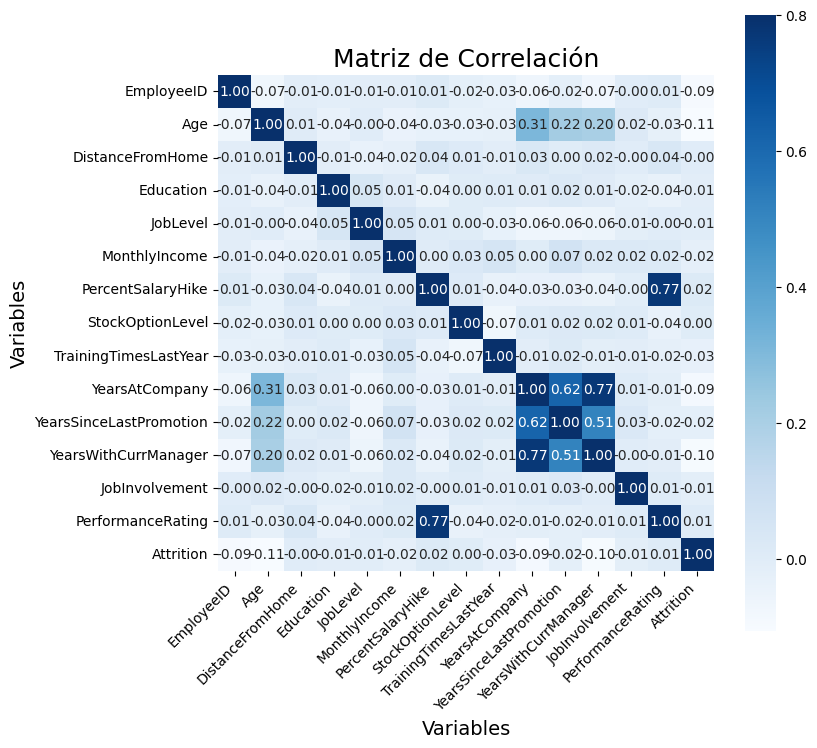

In [451]:
#Matriz de correlación 

# Selección de columnas numéricas
columnas_numericas = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Filtro de DataFrame a las variables numéricas
df_numerico = df[columnas_numericas]

# Calcular la matriz de correlación
corrmat = df_numerico.corr()

# Tamaño 
f, ax = plt.subplots(figsize=(8, 8)) 

# Mapa de calor
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, annot_kws={"fontsize": 10}, fmt=".2f", cmap='Blues')

# Etiqueta de los ejes
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Matriz de Correlación', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

plt.show()


De la matriz de correlación podemos observar que hay muchas variables que no tienen una fuerte correlación entre si, también vemos que hay una alta correlación entre las variables "PerformanceRating" y "PercentSalaryHike", esto nos indica que los empleados con mejor calificación de desempeño tienden a recibir aumentos salariales. 

También hay una correlación positiva entre "YearsAtCompany" y "YearsWithCurrManager", donde los empleados que han estado más tiempo en la compañía también han estado más tiempo con su gerente actual.

Finalmente, gay una correlación moderada entre 'YearsAtCompany' y 'YearsSinceLastPromotion' , esto nos podría indicar que a medida que un empleado pasa más tiempo en la compañía, es probable que haya pasado más tiempo desde su última promoción.

Exploración de variables


In [452]:
# Eliminación de las columnas EmployeeCount y StandardHours
df = df_merged3.drop(['EmployeeCount', 'StandardHours'], axis=1)

In [453]:
# Revisión de la variable objetivo "Attrition" 
df['Attrition'].describe()
df['Attrition'].unique()
df['Attrition'].nunique()
df['Attrition'].value_counts()

Attrition
0    8170
1     650
Name: count, dtype: int64

[Text(0, 0, '0'), Text(1, 0, '1')]

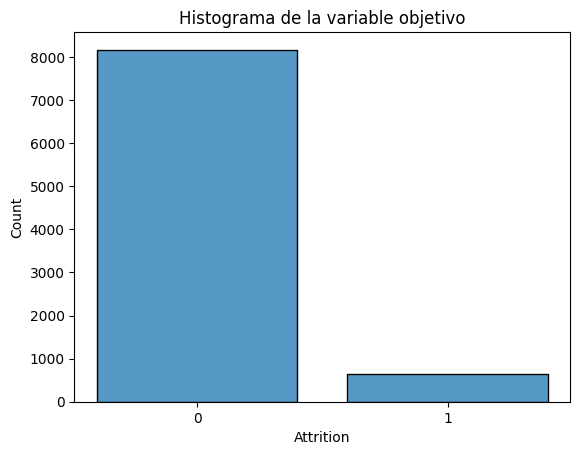

In [454]:
# Histograma de la variable objetivo
ax = sns.histplot(data=df, x='Attrition', bins=[0, 0.5, 1.5], discrete=True, shrink=0.8)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Histograma de la variable objetivo')

ax.set_xticks([0, 1])
ax.set_xticklabels(['0', '1'])

In [455]:
total=8170+650
total1=650/total
total0=8170/total

total1,total0

(0.07369614512471655, 0.9263038548752834)

La variable objetivo esta desbalanceada, ya que la mayoria de los empleados con un porcentaje de 93% continuan dentro de la empresa mientras que una pequeña proporción de 7% se ha retirado.

Analisis univariado

In [456]:
df['Month'].describe()
df['Month'].value_counts()

Month
Not Applicable    8170
5.0                 69
1.0                 66
7.0                 63
2.0                 61
3.0                 59
10.0                53
11.0                53
6.0                 52
4.0                 48
8.0                 48
9.0                 46
12.0                32
Name: count, dtype: int64

In [491]:
df_sin_month = df[df['Month'] != 'Not Applicable']

Se procede a eliminar la categoria de 'Not Applicable' para realizar mas adelante la visualización del número de retiros por mes, ya que esta presentaba un sesgo porque la mayoria de empleados continuan en la empresa.

In [497]:
df['BusinessTravel'].describe()
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        6258
Travel_Frequently    1662
Non-Travel            900
Name: count, dtype: int64

In [459]:
df['Department'].describe()
df['Department'].value_counts()

Department
Research & Development    5766
Sales                     2676
Human Resources            378
Name: count, dtype: int64

In [504]:
porcentajes_departamentos = df['Department'].value_counts(normalize=True) * 100

porcentajes_df = porcentajes_departamentos.to_frame()
porcentajes_df.columns = ['Porcentaje (%)']
porcentajes_df

,Porcentaje (%)
Department,
Research & Development,65.374150
Sales,30.340136
Human Resources,4.285714


La mayoria de los empleados se encuentran en el departamento de Research & Development con el 65,3% de empleados 

In [460]:
df['EducationField'].describe()
df['EducationField'].value_counts()

EducationField
Life Sciences       3636
Medical             2784
Marketing            954
Technical Degree     792
Other                492
Human Resources      162
Name: count, dtype: int64

In [461]:
df['Gender'].describe()
df['Gender'].value_counts()

Gender
Male      5292
Female    3528
Name: count, dtype: int64

In [506]:
porcentajes_generos = df['Gender'].value_counts(normalize=True) * 100

porcentajes_df_genero = porcentajes_generos.to_frame()
porcentajes_df_genero.columns = ['Porcentaje (%)']
porcentajes_df_genero

,Porcentaje (%)
Gender,
Male,60.0
Female,40.0


El 60% de los empleados de la empresa son hombres 

In [462]:
df['JobRole'].describe()
df['JobRole'].value_counts()

JobRole
Sales Executive              1956
Research Scientist           1752
Laboratory Technician        1554
Manufacturing Director        870
Healthcare Representative     786
Manager                       612
Sales Representative          498
Research Director             480
Human Resources               312
Name: count, dtype: int64

In [463]:
df['MaritalStatus'].describe()
df['MaritalStatus'].value_counts()

MaritalStatus
Married     4038
Single      2820
Divorced    1962
Name: count, dtype: int64

In [464]:
df['retirementType'].describe()
df['retirementType'].value_counts()

retirementType
Not Applicable    8170
Resignation        585
Fired               65
Name: count, dtype: int64

In [510]:
df_sin_retirementtype = df[df['retirementType'] != 'Not Applicable']

porcentajes_retirementtype = df_sin_retirementtype['retirementType'].value_counts(normalize=True) * 100
porcentajes_df_retirementtype = porcentajes_retirementtype.to_frame()
porcentajes_df_retirementtype.columns = ['Porcentaje (%)']

porcentajes_df_retirementtype


,Porcentaje (%)
retirementType,
Resignation,90.0
Fired,10.0


De las personas que ya no continuan en la compañía, el 90% lo hicieron renunciando, mientras que solo el 10% fueron despedidos

In [465]:
df['resignationReason'].describe()
df['resignationReason'].value_counts()

resignationReason
Not Applicable    8235
Others             296
Salary             173
Stress             116
Name: count, dtype: int64

In [512]:
df_sin_resignationreason = df[df['resignationReason'] != 'Not Applicable']

porcentajes_resignationreason = df_sin_resignationreason['resignationReason'].value_counts(normalize=True) * 100
porcentajes_df_resignationreason= porcentajes_resignationreason.to_frame()
porcentajes_df_resignationreason.columns = ['Porcentaje (%)']

porcentajes_df_resignationreason

,Porcentaje (%)
resignationReason,
Others,50.598291
Salary,29.572650
Stress,19.829060


In [466]:
df['YearRT'].describe()
df['YearRT'].value_counts()

YearRT
Not Applicable    8170
2016.0             650
Name: count, dtype: int64

Graficos de densidad para las variables númericas

In [ ]:
# Diagrama de densidad de EmployeeID
plt.hist(df['EmployeeID'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad EmployeeID')
plt.grid(True)

plt.show()

In [ ]:
# Diagrama de densidad de Year
plt.hist(df['Year'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Year')
plt.grid(True)

plt.show()

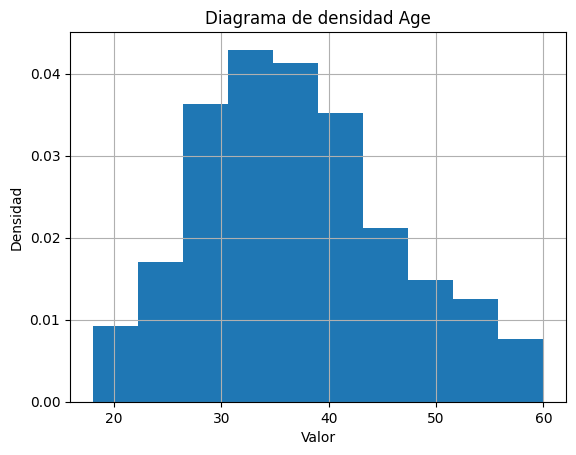

In [470]:
# Diagrama de densidad de Age
plt.hist(df['Age'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Age')
plt.grid(True)

plt.show()

La mayoría de las personas se encuentran entre los 30 y 40 años, por lo que existe un grupo significativo de empleados de mediana edad.

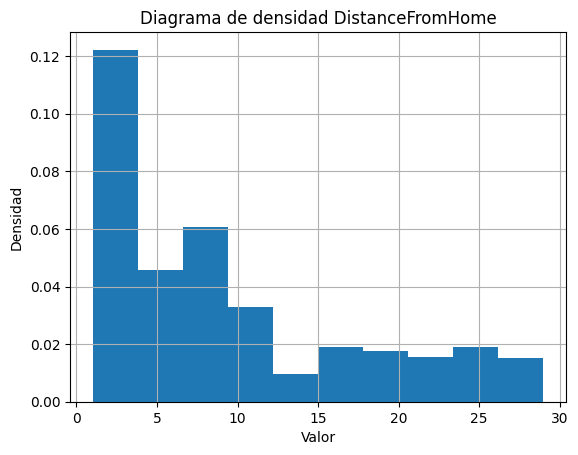

In [471]:
# Diagrama de densidad de DistanceFromHome
plt.hist(df['DistanceFromHome'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad DistanceFromHome')
plt.grid(True)

plt.show()

La mayoria de los empleados viven relativamente cerca de su lugar de trabajo, ya que la densidad es mas alta en los valores mas bajos de los valores de las unidades de distancia.

In [ ]:
# Diagrama de densidad de Education
plt.hist(df['Education'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad Education')
plt.grid(True)
plt.show()

In [ ]:
# Diagrama de densidad de JobLevel
plt.hist(df['JobLevel'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobLevel')
plt.grid(True)
plt.show()

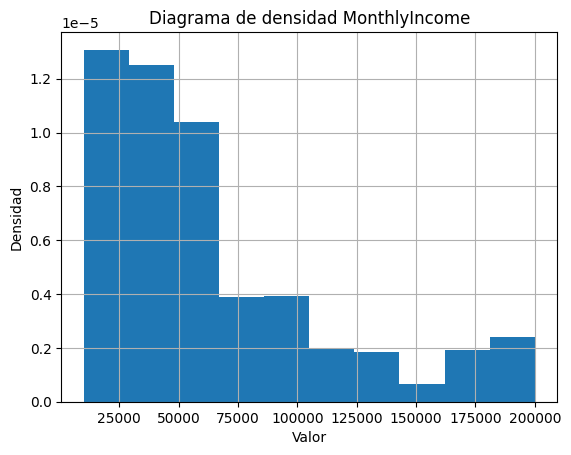

In [474]:
# Diagrama de densidad MonthlyIncome
plt.hist(df['MonthlyIncome'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad MonthlyIncome')
plt.grid(True)
plt.show()

Se podria decir que tiene un sesgo hacia la derecha, esto indica que hay algunos individuos que ganan significativamente más que el resto, pero la mayoría se concentra en los rangos salariales más bajos. Esta variable va ser tratada mas adelante.

In [ ]:
# Diagrama de densidad de NumCompaniesWorked
plt.hist(df['NumCompaniesWorked'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad NumCompaniesWorked')
plt.grid(True)
plt.show()

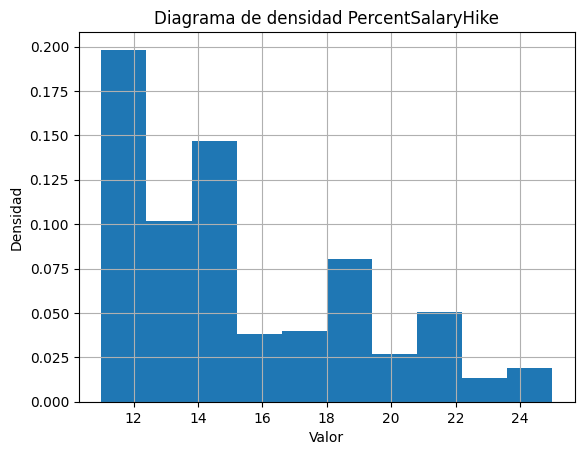

In [476]:
# Diagrama de densidad de PercentSalaryHike
plt.hist(df['PercentSalaryHike'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad PercentSalaryHike')
plt.grid(True)
plt.show()

La mayoría de los empleados reciben un aumento salarial en el rango bajo 10-12% aproximadamente, lo que podría significar que las políticas de aumento salarial dentro de la empresa son conservadoras y existen algunos casos de aumentos mayores con un sesgo hacia los valores más bajos por lo que se podria suponer que los aumentos salariales mas alto no se hace mucho dentro de la empresa.

In [ ]:
# Diagrama de densidad de StockOptionLevel
plt.hist(df['StockOptionLevel'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad StockOptionLevel')
plt.grid(True)
plt.show()

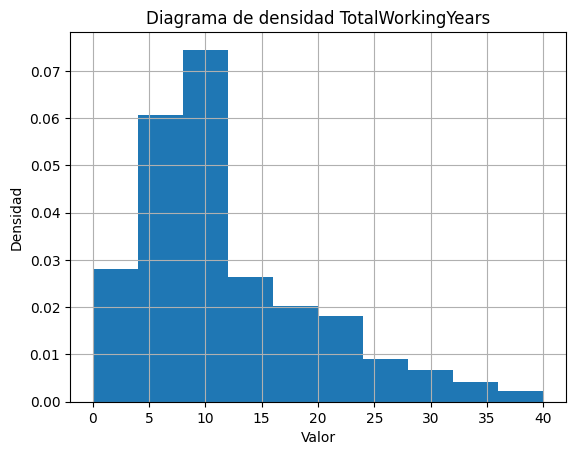

In [478]:
# Diagrama de densidad
plt.hist(df['TotalWorkingYears'], density=True)  # Ajusta el parámetro 'bins' para controlar la granularidad del histograma

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad TotalWorkingYears')
plt.grid(True)
plt.show()

A medida que aumenta el número de años trabajados, la densidad disminuye, lo que indica que hay muchos trabajadores con mucha experiencia.

In [ ]:
# Diagrama de densidad de TrainingTimesLastYear
plt.hist(df['TrainingTimesLastYear'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad TrainingTimesLastYear')
plt.grid(True)
plt.show() 

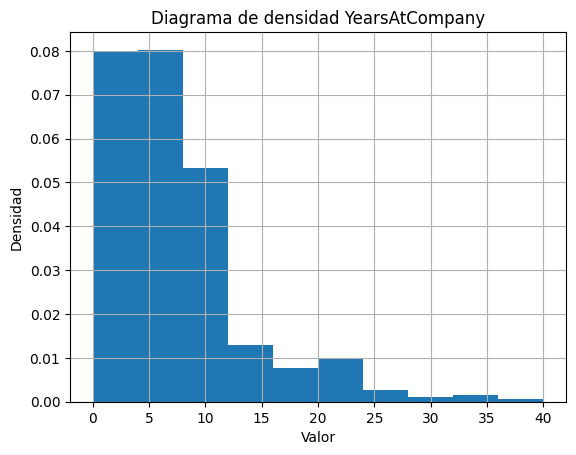

In [480]:
# Diagrama de densidad de YearsAtCompany
plt.hist(df['YearsAtCompany'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad YearsAtCompany')
plt.grid(True)
plt.show()

Hay mas empleados concentrados que llevan muy poco en la compañía, en comparación de los pocos empleados que tienen as de 20 años dentro de la empresa.

In [ ]:
# Diagrama de densidad de YearsSinceLastPromotion
plt.hist(df['YearsSinceLastPromotion'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad YearsSinceLastPromotion')
plt.grid(True)
plt.show()

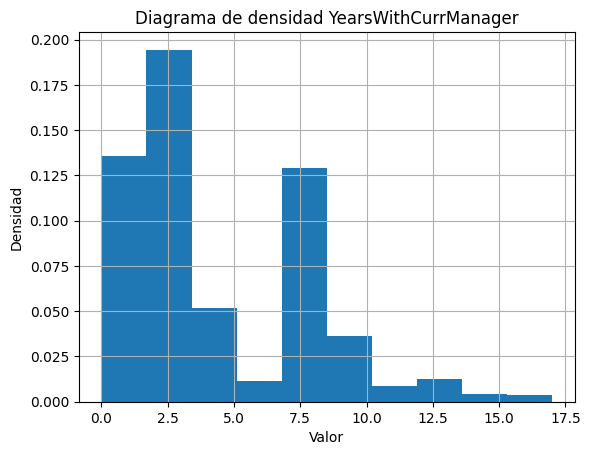

In [514]:
# Diagrama de densidad de YearsWithCurrManager
plt.hist(df['YearsWithCurrManager'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad YearsWithCurrManager')
plt.grid(True)
plt.show()

En la grafica se pueden observar unos picos. Esto podria ser debido a que han habido empleados que han trabajado con sus gerentes actuales por periodos de tiempo específicos, posiblemente relacionados con promociones, reestructuraciones o cambios de gestión.

In [ ]:
# Diagrama de densidad de EnvironmentSatisfaction
plt.hist(df['EnvironmentSatisfaction'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad EnvironmentSatisfaction')
plt.grid(True)
plt.show()

In [ ]:
# Diagrama de densidad de JobSatisfaction
plt.hist(df['JobSatisfaction'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobSatisfaction')
plt.grid(True)
plt.show()

In [ ]:
# Diagrama de densidad de WorkLifeBalance
plt.hist(df['WorkLifeBalance'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad WorkLifeBalance')
plt.grid(True)
plt.show()

In [ ]:
# Diagrama de densidad JobInvolvement
plt.hist(df['JobInvolvement'], density=True) 

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad JobInvolvement')
plt.grid(True)
plt.show()

In [ ]:
# Diagrama de densidad de PerformanceRating
plt.hist(df['PerformanceRating'], density=True)  

plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Diagrama de densidad PerformanceRating')
plt.grid(True)
plt.show()

Bivariado

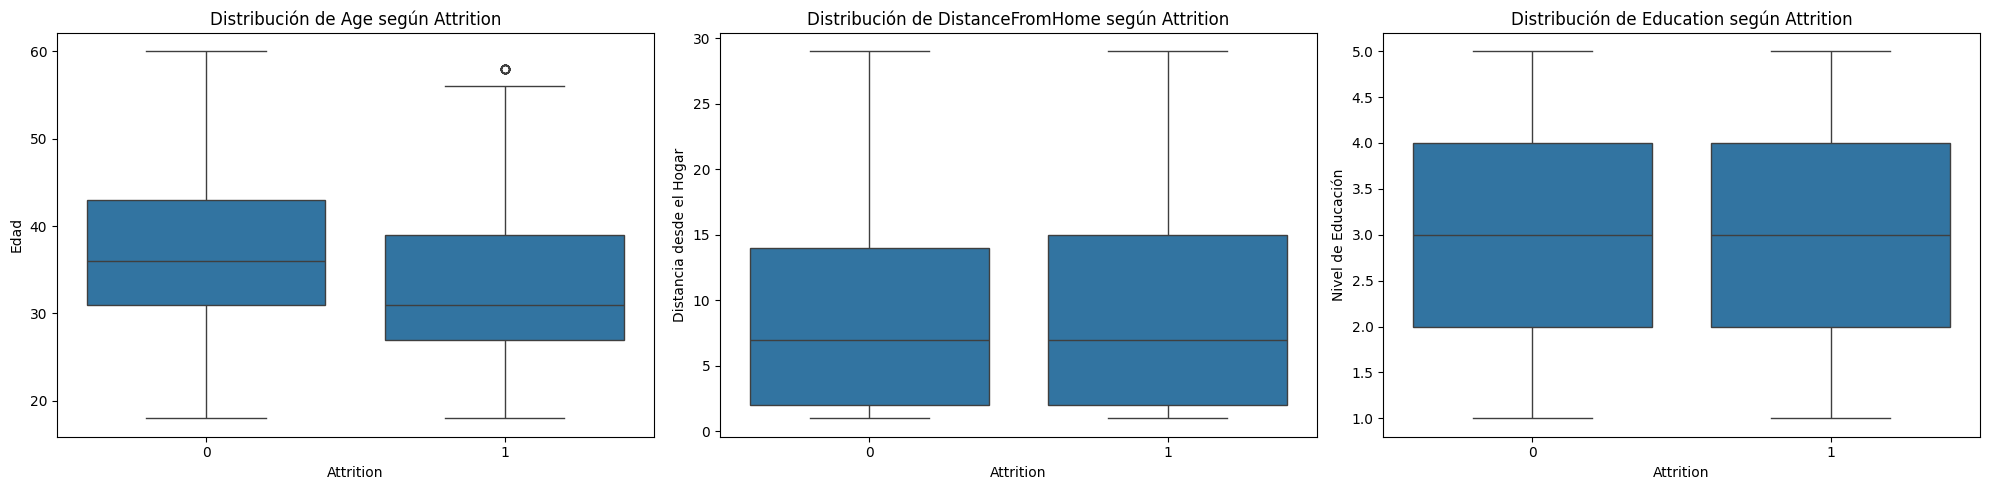

In [519]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Age
sns.boxplot(x='Attrition', y='Age', data=df, ax=axes[0])
axes[0].set_title('Distribución de Age según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Edad')

# DistanceFromHome
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax=axes[1])
axes[1].set_title('Distribución de DistanceFromHome según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Distancia desde el Hogar')

# Education
sns.boxplot(x='Attrition', y='Education', data=df, ax=axes[2])
axes[2].set_title('Distribución de Education según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Nivel de Educación')

plt.tight_layout()
plt.show()


Age: De los boxplot podemos evidenciar que los empleados que se van tienden a ser más jovenes que aquellos que se quedan. Tambien hay la presencia de un dato 'atipico' que en este caso no tendria ningun tipo de tratamiento ya que es la naturaleza de la variable o simplemente puede ser un error en la entrada de los datos.

DistanceFromHome: No se observan diferencias significativas en la distancia del hogar entre ambos grupos del Attrition, por lo que podriamos decir que la distancia del hogar no parece ser un factor determinante en la decisión de abandonar la empresa.

Education:No hay diferencias significativas, el nivel de educación no parece estar relacionado con la decisión de abandonar la empresa.

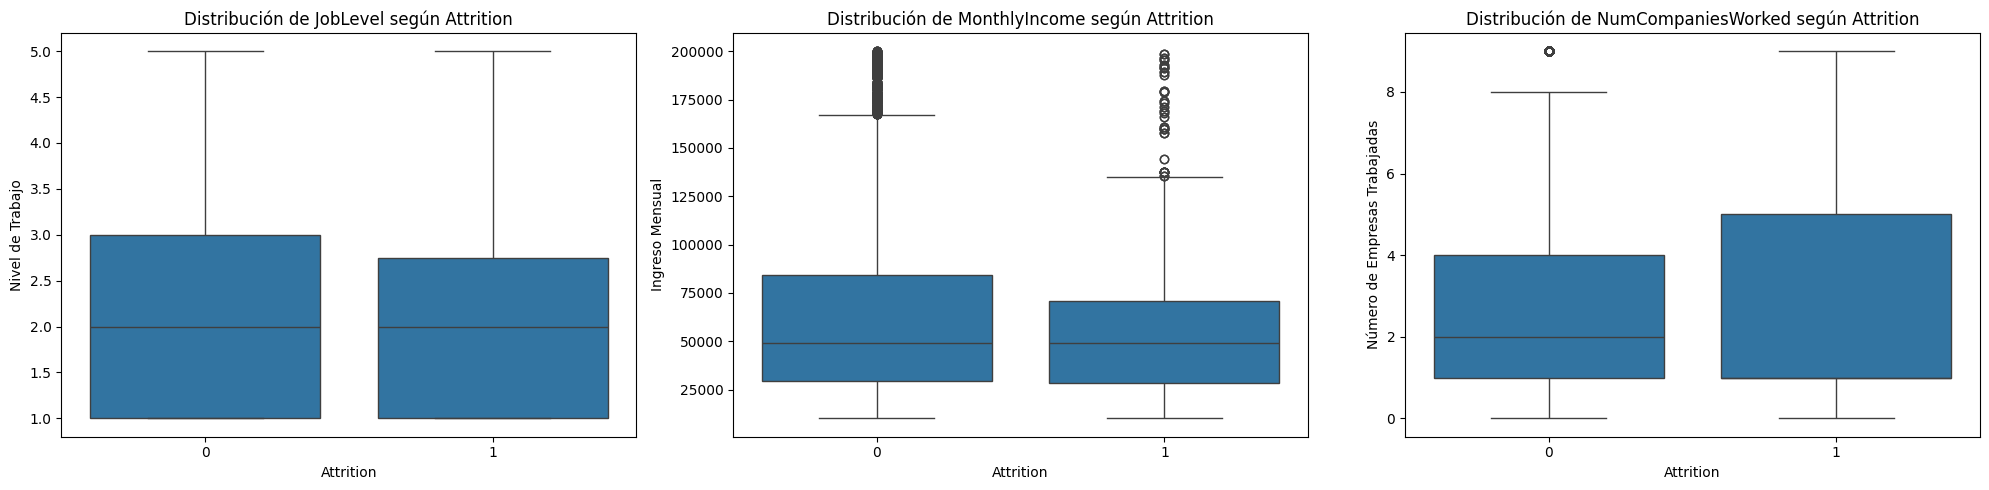

In [521]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# JobLevel
sns.boxplot(x='Attrition', y='JobLevel', data=df, ax=axes[0])
axes[0].set_title('Distribución de JobLevel según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Nivel de Trabajo')

# MonthlyIncome
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, ax=axes[1])
axes[1].set_title('Distribución de MonthlyIncome según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Ingreso Mensual')

# NumCompaniesWorked
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, ax=axes[2])
axes[2].set_title('Distribución de NumCompaniesWorked según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Número de Empresas Trabajadas')

plt.tight_layout()
plt.show()


JobLevel: El nivel de trabajo en la empresa no parece ser un factor determinante en la decisión de abandonar la empresa.

MonthlyIncome:  Los empleados que se van tienden a tener un ingreso mensual ligeramente inferior al de aquellos que se quedan. Se observa una mayor dispersión en el ingreso mensual del grupo de los que se van con algunos valores atípicos muy altos. Por lo que esta variable va ser tratada mas adelante.

NumCompaniesWorked: Los empleados que se van tienden a haber trabajado en un mayor número de empresas anteriormente. También podriamos decir que  empleados que se van parecen haber tenido una trayectoria laboral menos estable, lo que podría estar relacionado con la decisión de abandonar la empresa actual.

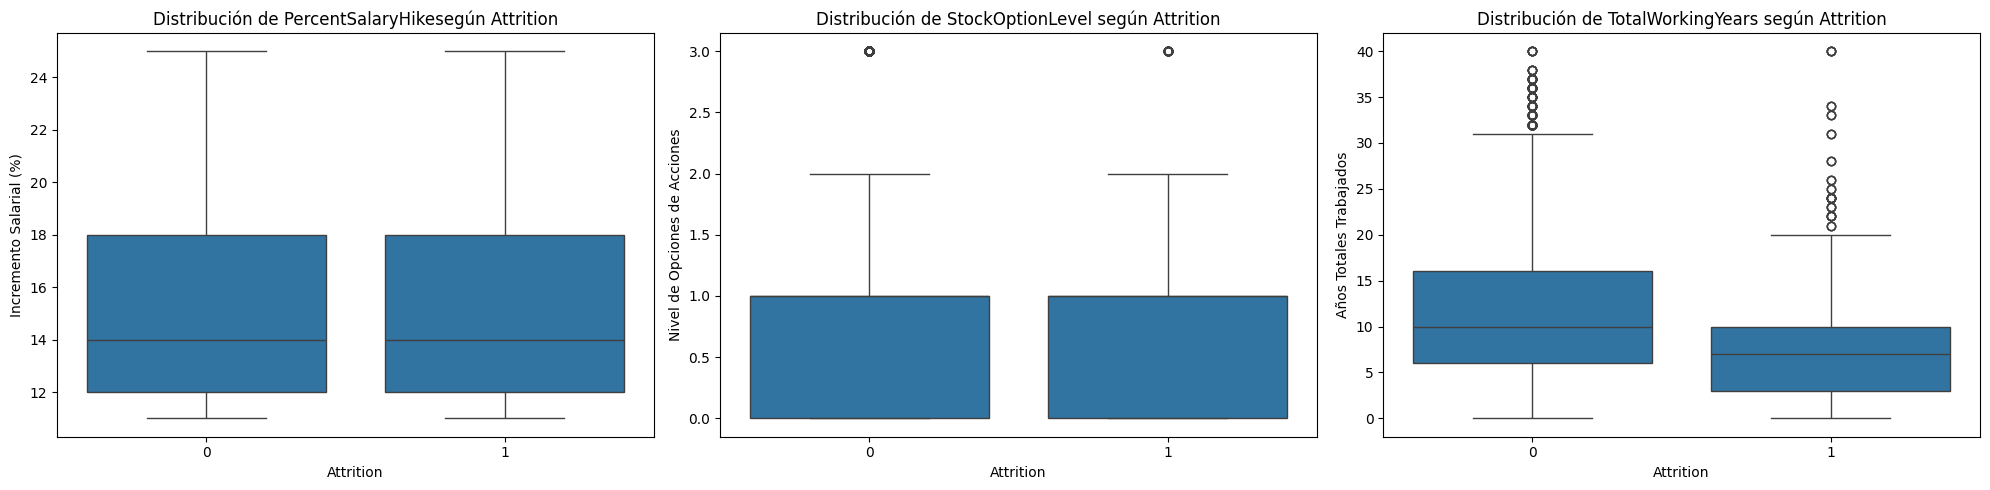

In [522]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# PercentSalaryHike
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df, ax=axes[0])
axes[0].set_title('Distribución de PercentSalaryHikesegún Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Incremento Salarial (%)')

# StockOptionLevel
sns.boxplot(x='Attrition', y='StockOptionLevel', data=df, ax=axes[1])
axes[1].set_title('Distribución de StockOptionLevel según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Nivel de Opciones de Acciones')

# Años Totales Trabajados
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df, ax=axes[2])
axes[2].set_title('Distribución de TotalWorkingYears según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Años Totales Trabajados')

plt.tight_layout()
plt.show()


PercentSalaryHike: No se observan diferencias significativas en el incremento salarial promedio entre ambos grupos. Por lo que podria ser un factor no muy determinante para tomar decisiones

StockOptionLevel: No se observan diferencias significativas en el StockOptionLevel entre ambos grupos, aunque se observan algunos valores atípicos

TotalWorkingYears: Los empleados que se van tienden a tener menos años totales trabajados en comparación con aquellos que se quedan. La dispersión  es mayor en el grupo de los que se van, con algunos valores atípicos de empleados con muchos años trabajados.

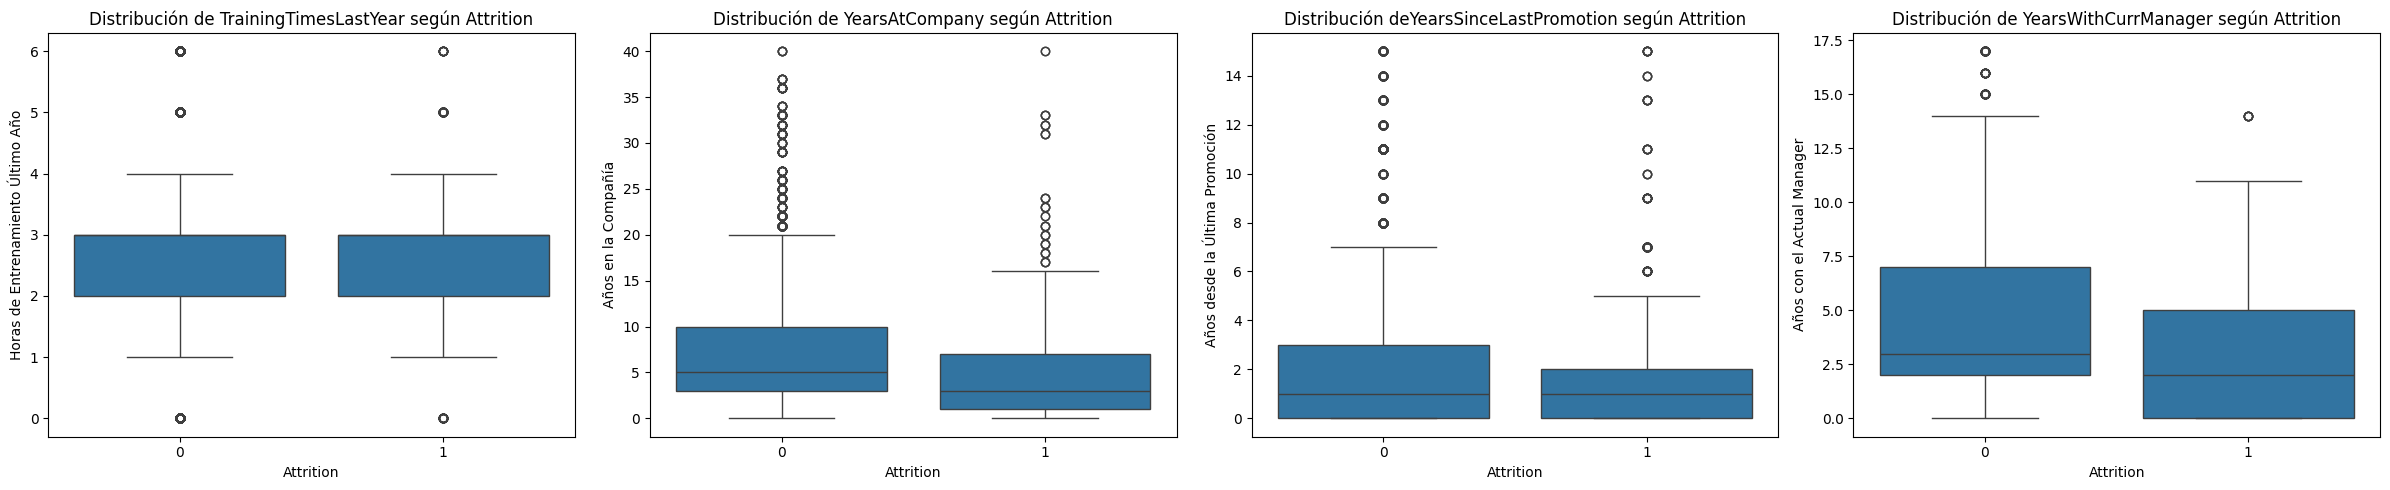

In [523]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Horas de TrainingTimesLastYear
sns.boxplot(x='Attrition', y='TrainingTimesLastYear', data=df, ax=axes[0])
axes[0].set_title('Distribución de TrainingTimesLastYear según Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Horas de Entrenamiento Último Año')

# YearsAtCompany
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, ax=axes[1])
axes[1].set_title('Distribución de YearsAtCompany según Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('Años en la Compañía')

# YearsSinceLastPromotion
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=df, ax=axes[2])
axes[2].set_title('Distribución deYearsSinceLastPromotion según Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Años desde la Última Promoción')

# YearsWithCurrManager
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=df, ax=axes[3])
axes[3].set_title('Distribución de YearsWithCurrManager según Attrition')
axes[3].set_xlabel('Attrition')
axes[3].set_ylabel('Años con el Actual Manager')

plt.tight_layout()
plt.show()


TrainingTimesLastYear: La mediana es similar en ambos grupos, también hay algunos outliers en ambos grupos, pero estos parecen ser simétricos, indicando que el número de horas de entrenamiento no muestra una diferencia significativa con respecto a la retención de empleados.

YearsAtCompany: Se observa que la mediana de los años en la compañía es ligeramente menor para los empleados que dejaron la empresa. También vemos una mayor cantidad de outliers en ambos grupos, especialmente en los empleados que se quedaron, lo cual indica que hay algunos empleados con una permanencia larga.

YearsSinceLastPromotion: La mediana de años desde la última promoción es similar entre los dos grupos, pero ligeramente mayor la de los que permanecen 

YearsWithCurrManager: La mediana de años con el actual manager es más baja para los empleados que dejaron la empresa, lo que podría indicar que un menor tiempo con el manager actual está asociado con una mayor probabilidad de rotación. También vemos una cantidad de outliers en ambos grupos pero mas en el grupo de personas que permanecen en la empresa.